In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import itertools
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
activities=["climbingdown","climbingup","jumping","lying","running","sitting","standing","walking"]
location='/content/drive/MyDrive/Major_Project/clean_data.csv'
data=pd.read_csv(location)
data.drop(data.columns[[0]],axis=1,inplace=True)

In [29]:
def Range(a):
    return a.max()-a.min();
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap='YlOrRd'):
    plt.rcParams.update({'font.size': 18})
    plt.figure(figsize=(20,10),)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout();

In [30]:
range_sample=data.groupby(['Activity','Subject','Sample_Num']).apply(Range).add_prefix('range_')
stdev_sample=data.groupby(['Activity','Subject','Sample_Num']).std().add_prefix('std_')
mean_sample=data.groupby(['Activity','Subject','Sample_Num']).mean().add_prefix('mean_')
total_data=pd.concat([stdev_sample,mean_sample,range_sample],axis=1)
total_data.reset_index(inplace=True)

In [31]:
columns=[
       'std_attr_x_gyro', 'std_attr_y_gyro', 'std_attr_z_gyro',
         'std_attr_x_acc', 'std_attr_y_acc', 'std_attr_z_acc', 
         'mean_attr_x_gyro', 'mean_attr_y_gyro', 'mean_attr_z_gyro', 
         'mean_attr_x_acc', 'mean_attr_y_acc', 'mean_attr_z_acc',
         'range_attr_x_gyro', 'range_attr_y_gyro','range_attr_z_gyro', 
         'range_attr_x_acc', 'range_attr_y_acc', 'range_attr_z_acc']

In [32]:
temp=total_data.Subject>=5
X_final=total_data[columns][temp]
Y_final=total_data.Activity[temp]

In [33]:
# Loading previously saved Random Forest model
pkl="/content/drive/MyDrive/Major_Project/Random_Forest_Model.pkl"
classifier=pickle.load(open(pkl,'rb'))

In [34]:
# Making predictions for last two unseen subjects
Y_predicted=classifier.predict(X_final)
print(f'Testing F1 score is: {f1_score(Y_final,Y_predicted,average="macro"):.3f}')
print(f'Testing accuracy is: {accuracy_score(Y_final,Y_predicted):.3f}')
print(classification_report(Y_final,Y_predicted))

Testing F1 score is: 0.677
Testing accuracy is: 0.739
              precision    recall  f1-score   support

climbingdown       0.43      0.11      0.17       456
  climbingup       0.38      0.71      0.50       523
     jumping       0.91      0.34      0.50        93
       lying       1.00      0.81      0.90       634
     running       0.96      0.99      0.98       606
     sitting       0.87      0.97      0.92       627
    standing       0.94      1.00      0.97       644
     walking       0.52      0.46      0.48       629

    accuracy                           0.74      4212
   macro avg       0.75      0.67      0.68      4212
weighted avg       0.75      0.74      0.72      4212



<Figure size 432x288 with 0 Axes>

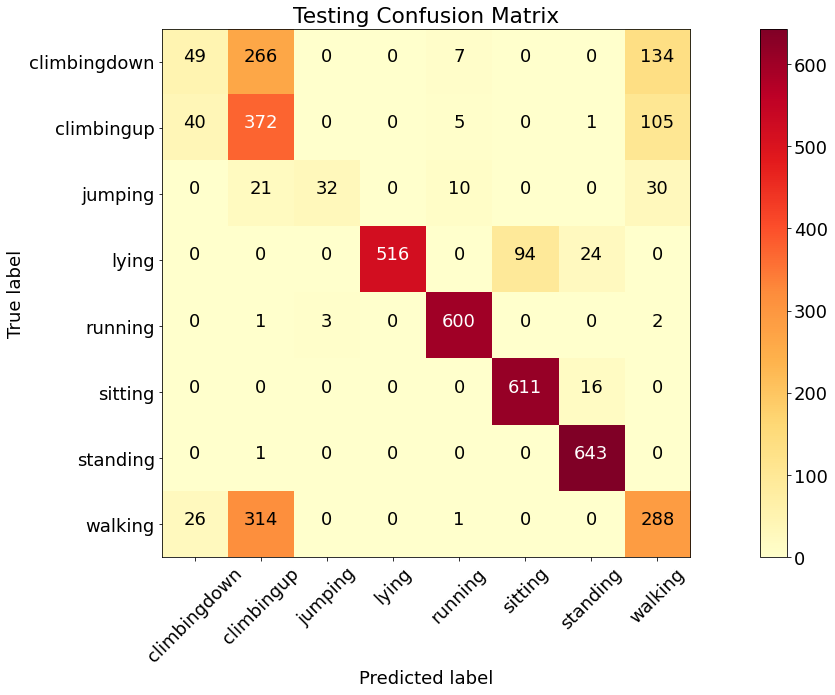

In [35]:
np.set_printoptions(precision=2)
cm=confusion_matrix(Y_final,Y_predicted)
plt.figure()
plot_confusion_matrix(cm,classes=activities,title='Testing Confusion Matrix');